# Data Understanding

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.<br>This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

<li>BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
<li>BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
<li>BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time. See the glossary linked to below.
    <br><br>
Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

<li>Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
<br>
<li>This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.


## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import math
import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import datetime

## Load Dataset

In [2]:
df_sales = pd.read_csv('../dataset/nyc_rolling_sales.csv')


In [3]:
pd.set_option('display.max_columns', None) # Untuk menampilkan semua kolom

In [4]:
df_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [5]:
df_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,,10309,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
# Melihat dimensi dataset
df_sales.shape

(84548, 22)

In [7]:
# Melihat infromasi tipe-tipe data tiap kolom pada dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Berdasarkan output dari dimensi dan informasi dataset, diketahui bahwa terdapat 84548 baris atau observasi dan 22 kolom.

## Data Preprocessing and Cleaning

### Drop kolom yang tidak dibutuhkan

In [8]:
df_sales.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1, inplace=True)

### Mengganti tipe data beberapa kolom menjadi categorical

In [9]:
categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
for col in categoricals:
    df_sales[col] = df_sales[col].astype('category')

### Mengubah tipe data beberapa kolom menjadi numerical

In [10]:
num = ['LAND SQUARE FEET',
       'GROSS SQUARE FEET',
       'SALE PRICE'
      ]

for col in num:
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce')

### Membuat kolom baru yang berisi keterangan tanggal, bulan dan tahun

In [11]:
df_sales['SALE DATE'] = pd.to_datetime(df_sales['SALE DATE'])
df_sales['SALE MONTH'] = df_sales['SALE DATE'].dt.month_name
df_sales['SALE YEAR'] = df_sales['SALE DATE'].dt.year

### Identify Missing Value

In [12]:
df_nan = round((df_sales.isnull().sum())/len(df_sales)*100,2)
df_nan = pd.DataFrame(df_nan)
df_nan = df_nan.rename(columns={0:'missing_value_percentage'})
df_nan

,missing_value_percentage
BOROUGH,0.00
NEIGHBORHOOD,0.00
BUILDING CLASS CATEGORY,0.00
TAX CLASS AT PRESENT,0.00
BUILDING CLASS AT PRESENT,0.00
RESIDENTIAL UNITS,0.00
COMMERCIAL UNITS,0.00
TOTAL UNITS,0.00
LAND SQUARE FEET,31.05
GROSS SQUARE FEET,32.66


Berdasarkan tabel *missing values* di atas, diketahui bahwa terdapat 31% *missing values* pada kolom `LAND SQUARE FEET`, 33% *missing values* pada kolom `GROSS SQUARE FEET`, dan 17% *missing values* pada kolom `SALE PRICE`. Sebelumnya telah diketahui bahwa dataset yang digunakan merupakan *financial dataset* di mana terdapat keterangan jika harga properti yang terjual senilai $0, maka ada beberapa kemungkinan bahwa properti tersebut merupakan *transfering ownership*. Selain itu, kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET` yang mengandung *missing values* dianggap data yang tidak valid, sehingga semua *missing values* akan didrop atau dihilangkan dari dataset.

In [13]:
df_sales = df_sales.dropna()

In [14]:
# Memeriksa kembali apakah masih terdapat missing value atau tidak
df_sales.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
SALE MONTH                        False
SALE YEAR                         False
dtype: bool

Berdasarkan output diatas menghasilkan nilai *False* yang artinya tidak ada *missing value*.

### Identify Duplicated Value

In [15]:
df_sales.duplicated().sum()

959

Berdasarkan output diatas diketahui terdapat 959 baris duplikasi, sehingga baris tersebut harus di drop atau dihilangkan dari dataset

In [16]:
df_sales = df_sales.drop_duplicates(df_sales.columns, keep='last')

In [17]:
df_sales.duplicated().sum()

0

### Mapping pada kolom BOROUGH

Karena kolom `BOROUGH` pada dataset masih berupa kategori angka, maka akan diubah masing-masing angka tersebut berdasarkan nama borough pada angka tersebut.

In [18]:
df_sales['BOROUGH'] = df_sales['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,<bound method PandasDelegate._add_delegate_acc...,2017
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,<bound method PandasDelegate._add_delegate_acc...,2016
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,<bound method PandasDelegate._add_delegate_acc...,2016


### Mengatasi *outlier* pada masing-masing kolom numerik

In [19]:
df_sales.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR
count,47285.000000,47285.000000,47285.000000,4.728500e+04,4.728500e+04,4.728500e+04,47285.000000
mean,2.514053,0.239717,2.770561,3.291470e+03,3.530269e+03,1.171341e+06,2016.647393
std,16.532690,10.915300,19.935527,3.071844e+04,2.916192e+04,1.352859e+07,0.477787
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016.000000
25%,1.000000,0.000000,1.000000,1.463000e+03,8.840000e+02,1.247340e+05,2016.000000
50%,1.000000,0.000000,1.000000,2.150000e+03,1.628000e+03,4.900000e+05,2017.000000
75%,2.000000,0.000000,2.000000,3.088000e+03,2.520000e+03,8.400000e+05,2017.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2017.000000


In [20]:
df_sales.describe(include='category')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE
count,47285,47285,47285,47285,47285,47285,47285,47285
unique,5,251,47,11,160,151,4,160
top,Brooklyn,BEDFORD STUYVESANT,01 ONE FAMILY DWELLINGS,1,A1,1920,1,A1
freq,23395,1387,14301,30953,5224,4465,32151,5219


Penentuan outlier dan nilai-nilai lain yang tidak signifikan pada dataset berdasarkan tabel informasi statistik di atas.

### Columns SALE PRICE

Diketahui berdasarkan nilai maksimum pada kolom `SALE PRICE` adalah sekitar 2.000.000.000 USD, sedangkan nilai kuartil-3-nya adalah sekitar 8.400.000 USD. Maka dari itu, akan dilihat distribusi frekuensi kolom `SALE PRICE` di mana nilai harga penjualan di atas 10.000.000 USD tidak disertakan.

Text(0.5, 1.0, 'Distribusi SALE PRICE')

<Figure size 720x360 with 0 Axes>

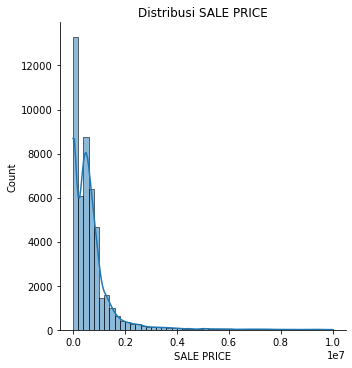

In [21]:
df_sales = df_sales[df_sales['SALE PRICE']<10000000].copy()
plt.figure(figsize=(10,5))
sns.displot(df_sales['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')

Karena masih terdapat nilai harga penjualan yang berbeda signifikan, maka akan nilai harga penjualan di atas 5.000.000 USD tidak akan disertakan, selain itu berdasarkan nilai kuartil-1 yaitu sekitar 100.000 USD, harga penjualan di bawah ini juga tidak akan disertakan dalam analisis. Sehingga, didapatkan distribusi frekuensi sebagai berikut:

Text(0.5, 1.0, 'Distribusi SALE PRICE')

<Figure size 720x360 with 0 Axes>

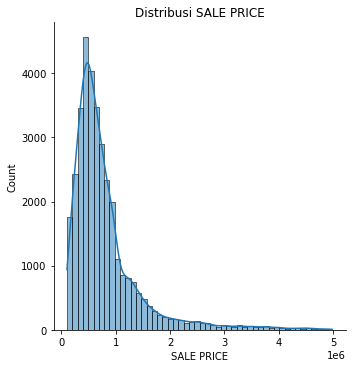

In [22]:
df_sales = df_sales[(df_sales['SALE PRICE']>100000) & (df_sales['SALE PRICE']<5000000)]
plt.figure(figsize=(10,5))
sns.displot(df_sales['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')

In [23]:
df_sales['SALE PRICE'].describe()

count    3.458700e+04
mean     7.965060e+05
std      6.536591e+05
min      1.007000e+05
25%      4.160950e+05
50%      6.160000e+05
75%      9.300000e+05
max      4.986410e+06
Name: SALE PRICE, dtype: float64

Berdasarkan analisis di atas, diketahui bahwa kolom `SALE PRICE` pada dataset awal memiliki nilai minimum 0 dan nilai maksimum sekitar 2.000.000.000 USD, di mana nilai di bawah kuartil 1 dan nilai di atas kuartil 3 dianggap sebagai *outlier*, sehingga pada dataset akhir didapat nilai minimum sekitar 100.000 USD dan nilai maksimum sekitar 5.000.000 USD.

### Kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`

Berdasarkan tabel informasi statistik pada kolom `LAND SQUARE FEET` dan `GROSS SQUARE FEET`, terdapat nilai 0 pada kedua kolom ini, sehingga baris yang mengandung nilai 0 pada kedua kolom ini tidak disertakan dalam analisis karena ukuran lahan properti dalam satuan feet tidak memiliki kemungkinan bernilai 0.

In [24]:
df_sales = df_sales[df_sales['LAND SQUARE FEET'] != 0]
df_sales = df_sales[df_sales['GROSS SQUARE FEET'] != 0]

### Kolom `TOTAL UNITS`

Pada analisis berikut ini, kolom `TOTAL UNITS` akan dilihat nilai yang tidak signifikan.

In [25]:
df_sales[['TOTAL UNITS','SALE PRICE']].groupby(['TOTAL UNITS']).count().sort_values(by='SALE PRICE',ascending=False)

,SALE PRICE
TOTAL UNITS,
1,12645
2,9507
3,2720
4,704
6,361
...,...
51,1
34,1
47,1


Berdasarkan tabel berikut diketahui bahwa terdapat 1 gedung properti yang memiliki total unit 2261, sehingga baris ini tidak disertakan dalam analisis.

In [26]:
df_sales = df_sales[(df_sales['TOTAL UNITS'] > 0) & (df_sales['TOTAL UNITS'] != 2261)]

### Kolom `YEAR BUILT`

Nilai 0 pada kolom `YEAR BUILT` tidak akan disertakan dalam analisis.

In [27]:
df_sales = df_sales[df_sales['YEAR BUILT'] != 0]

## Final Data

In [28]:
# Mengurutkan indeks sesuai dengan nomor baris
df_sales.reset_index(inplace=True)
df_sales.head()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR
0,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016
1,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016
2,172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,<bound method PandasDelegate._add_delegate_acc...,2016
3,174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S5,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,<bound method PandasDelegate._add_delegate_acc...,2017
4,195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,<bound method PandasDelegate._add_delegate_acc...,2016


In [29]:
df_sales.shape

(26655, 18)

In [30]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26655 entries, 0 to 26654
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26655 non-null  int64         
 1   BOROUGH                         26655 non-null  category      
 2   NEIGHBORHOOD                    26655 non-null  category      
 3   BUILDING CLASS CATEGORY         26655 non-null  category      
 4   TAX CLASS AT PRESENT            26655 non-null  category      
 5   BUILDING CLASS AT PRESENT       26655 non-null  category      
 6   RESIDENTIAL UNITS               26655 non-null  int64         
 7   COMMERCIAL UNITS                26655 non-null  int64         
 8   TOTAL UNITS                     26655 non-null  int64         
 9   LAND SQUARE FEET                26655 non-null  float64       
 10  GROSS SQUARE FEET               26655 non-null  float64       
 11  YE

In [31]:
kol = ['index']
df_sales.drop(kol, axis=1, inplace=True)

In [32]:
# Nilai statistik kolom numerik pada dataset baru
df_sales.describe() 

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR
count,26655.000000,26655.000000,26655.000000,2.665500e+04,2.665500e+04,2.665500e+04,26655.000000
mean,2.080773,0.117802,2.197336,3.603452e+03,2.686305e+03,8.062293e+05,2016.647383
std,12.937363,1.258036,13.119845,3.212287e+04,2.520718e+04,6.452676e+05,0.477794
min,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1.007000e+05,2016.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,4.400000e+05,2016.000000
50%,2.000000,0.000000,2.000000,2.500000e+03,1.813000e+03,6.250000e+05,2017.000000
75%,2.000000,0.000000,2.000000,3.840000e+03,2.505000e+03,9.210510e+05,2017.000000
max,1844.000000,126.000000,1866.000000,4.228300e+06,3.750565e+06,4.975000e+06,2017.000000


# Analisis data dengan Descriptive Statistics dan Inferential

Setelah dilakukannya data cleaning and preprocessing akan dilakukan analisis data dengan statistik deskriptif dan inferensia untuk mengetahui informasi yang terkandung dalam data. Menggunakan analisis statistik deskriptif & inferensia dapat menjawab pertanyaan/asumsi pada dataset sebagai berikut:

## Distribusi statistik harga penjualan unit properti di NYC

In [33]:
df_sales['SALE PRICE'].describe()

count    2.665500e+04
mean     8.062293e+05
std      6.452676e+05
min      1.007000e+05
25%      4.400000e+05
50%      6.250000e+05
75%      9.210510e+05
max      4.975000e+06
Name: SALE PRICE, dtype: float64

In [34]:
# Nilai modus harga penjualan unit property di NYC
df_sales['SALE PRICE'].mode()

0    700000.0
Name: SALE PRICE, dtype: float64

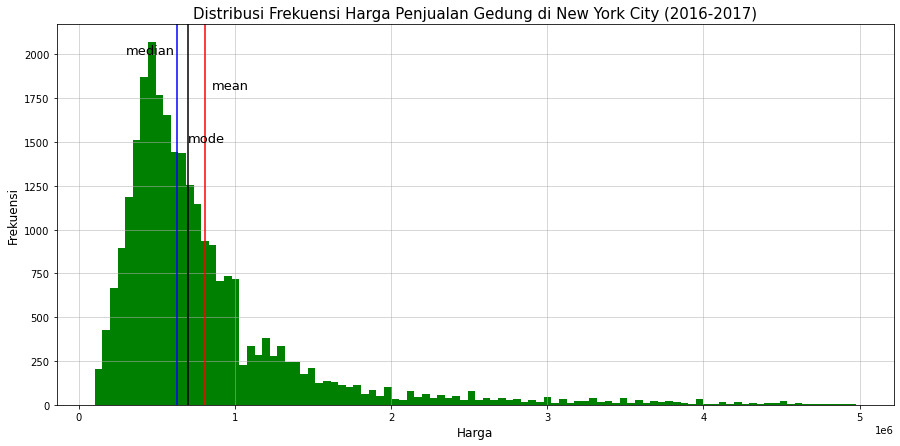

In [35]:
df_sales['SALE PRICE'].plot(kind='hist', figsize=(15,7), bins=100, color='g')
plt.title("Distribusi Frekuensi Harga Penjualan Gedung di New York City (2016-2017)", fontsize=15)
plt.xlabel('Harga', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_sales['SALE PRICE'].mean(), c='red')
plt.axvline(df_sales['SALE PRICE'].median(), c='blue')
plt.axvline(df_sales['SALE PRICE'].mode()[0], c='black')
plt.text(300000, 2000, 'median', fontsize=13)
plt.text(850000, 1800, 'mean', fontsize=13)
plt.text(700000, 1500, 'mode', fontsize=13)
plt.grid(linewidth=0.5)

Berdasarkan plot diatas, dapat diketahui distribusi statistik harga penjualan properti di New York dimana frekuensi tertinggi harga prorerty dibawah 1.000.000 USD. Rata-rata harga penjualan property sebesar 800.000 USD, median harga penjualan property sebesar 625.000 USD, dan property di New York City paling banyak terjual di harga 700.000 USD. Selanjutnya akan dilihat ukuran penyebaran harga property berikut:

In [36]:
print('Range: ', np.ptp(df_sales['SALE PRICE']))
print('Variance: ', np.var(df_sales['SALE PRICE'], ddof=1))
print('Standar Deviation: ', np.std(df_sales['SALE PRICE'], ddof=1))
print('Skewness: ', scipy.stats.skew(df_sales['SALE PRICE'], bias=False))

Range:  4874300.0
Variance:  416370292114.4177
Standar Deviation:  645267.6127890022
Skewness:  2.8223333167781344


Diketahui bahwa nilai variance dan standar deviasi cukup besar, artinya data sangat bervariasi. Dalam kata lain, rata-rata jarak penyimpangan setiap titik data terhadap rata-ratanya sangat besar. Selain itu, harga penjualan property juga memiliki nilai _skewness_ atau kemiringan yang positif, yang berarti nilai rata-rata lebih besar dari nilai tengahnya. _Range_ atau selisih nilai maksimum dan minimumnya adalah 4.874.300 USD.

---
### Apakah ada perbedaan nilai statistik harga penjualan berdasarkan wilayahnya (`BOROUGH`)

In [37]:
# Membuat tabel nilai rata-rata harga penjualan berdasarkan masing-masing borough
df_borough = df_sales[['BOROUGH','SALE PRICE']]
df_borough_mean = df_borough.groupby('BOROUGH').mean().sort_values(by='SALE PRICE', ascending=True).reset_index()

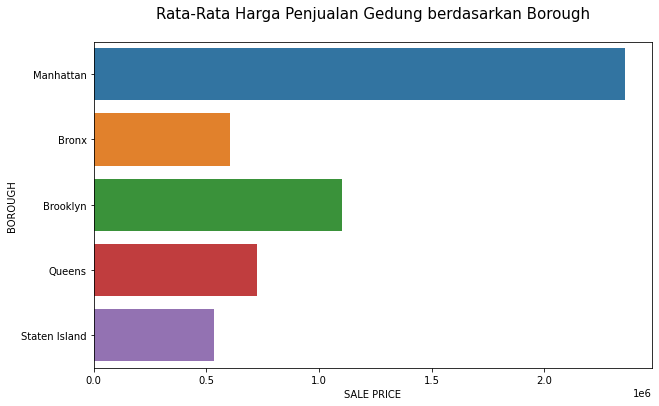

In [38]:
# Visualisasi menggunakan bar chart
plt.figure(figsize=(10,6))
sns.barplot(y ='BOROUGH', x ='SALE PRICE', data=df_borough_mean)
plt.title('Rata-Rata Harga Penjualan Gedung berdasarkan Borough\n',fontsize=15)
plt.show()

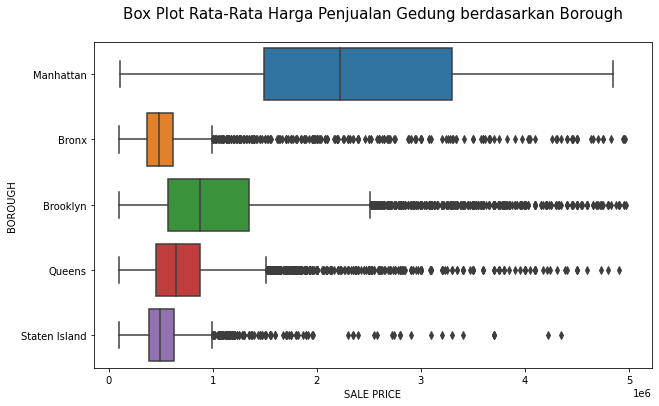

In [39]:
# Visualisasi menggunakan box chart
plt.figure(figsize=(10,6))
sns.boxplot(y ='BOROUGH', x ='SALE PRICE', data=df_borough)
plt.title('Box Plot Rata-Rata Harga Penjualan Gedung berdasarkan Borough\n',fontsize=15)
plt.show()

Berdasarkan plot di atas, diketahui bahwa wilayah Manhattan memiliki rata-rata harga penjualan properti tertinggi, sedangkan wilayah Staten Island memiliki rata-rata harga penjualan properti terendah. Sehingga dapat disimpulkan bahwa masing-masing wilayah memiliki perbedaan rata-rata harga penjualan properti, terutama pada wilayah Manhattan yang memiliki perbedaan rata-rata yang cukup signifikan dibandingkan wilayah lain. Berikut adalah nilai variance dan standar deviation masing-masing wilayah:

In [40]:
# Membuat tabel nilai harga penjualan berdasarkan masing-masing borough
df_manhattan = df_borough[df_borough['BOROUGH']=='Manhattan']
df_bronx = df_borough[df_borough['BOROUGH']=='Bronx']
df_brooklyn = df_borough[df_borough['BOROUGH']=='Brooklyn']
df_queens = df_borough[df_borough['BOROUGH']=='Queens']
df_staten = df_borough[df_borough['BOROUGH']=='Staten Island']

# Menampilkan nilai varians dan standar deviasi masing-masing borough
print("Variance and Standar Deviation each Borough:\n")
print('Manhattan: ',np.var(df_manhattan['SALE PRICE'], ddof=1), 'and',np.std(df_manhattan['SALE PRICE'], ddof=1))
print('Bronx: ',np.var(df_bronx['SALE PRICE'], ddof=1), 'and',np.std(df_bronx['SALE PRICE'], ddof=1))
print('Brooklyn: ',np.var(df_brooklyn['SALE PRICE'], ddof=1), 'and',np.std(df_brooklyn['SALE PRICE'], ddof=1))
print('Queens: ',np.var(df_queens['SALE PRICE'], ddof=1), 'and',np.std(df_queens['SALE PRICE'], ddof=1))
print('Staten Island: ',np.var(df_staten['SALE PRICE'], ddof=1), 'and',np.std(df_staten['SALE PRICE'], ddof=1))

Variance and Standar Deviation each Borough:

Manhattan:  1506488719848.2815 and 1227391.0215771832
Bronx:  330669796970.9491 and 575038.9525683883
Brooklyn:  645118390901.685 and 803192.6237844102
Queens:  206244526894.4386 and 454141.52738374256
Staten Island:  75236840611.08807 and 274293.3477339326


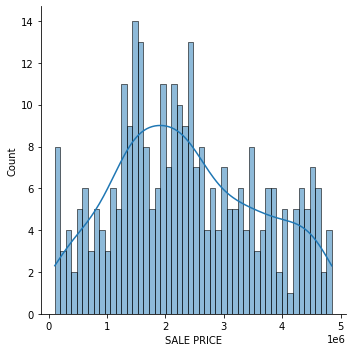

In [74]:
sns.displot(df_manhattan['SALE PRICE'], kde=True, bins=50)


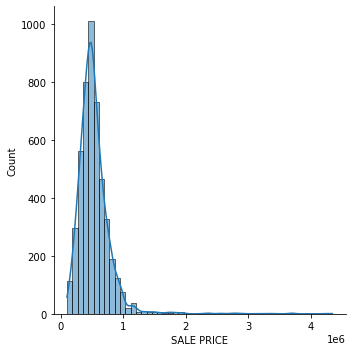

In [73]:
sns.displot(df_staten['SALE PRICE'], kde=True, bins=50)

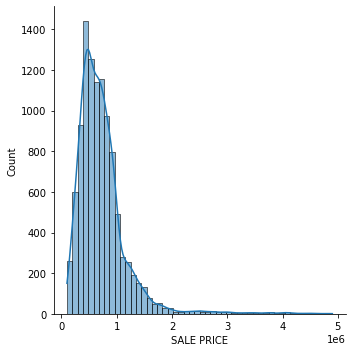

In [72]:
sns.displot(df_queens['SALE PRICE'], kde=True, bins=50)


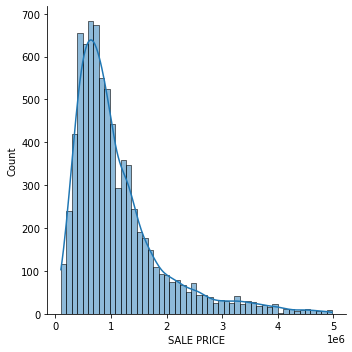

In [71]:
sns.displot(df_brooklyn['SALE PRICE'], kde=True, bins=50)


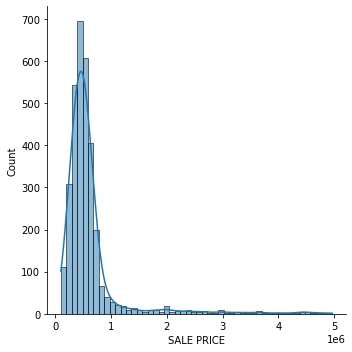

In [70]:
sns.displot(df_bronx['SALE PRICE'], kde=True, bins=50)


Berdasarkan output di atas, diketahui secara grafis bahwa wilayah `Bronx`, `Brooklyn`, `Queens`, dan `Staten Island` tidak memiliki perbedaan distribusi frekuensi nilai harga penjualan properti yang signifikan. Sedangkan wilayah `Manhattan` memiliki distribusi frekuensi yang berbeda dengan wilayah lain. Dilihat dari nilai statistik varians dan standar deviasi, wilayah `Manhattan` memiliki nilai varians dan standar deviasi tertinggi, yang berarti nilai harga penjualan properti di `Manhattan` sangat bervariasi dibandingkan dengan daerah lain.

---
## Apakah ada perbedaan nilai statistik harga penjualan unit berdasarkan kategori kelas bangunannya(`BUILDING CLASS CATEGORY`)?

In [42]:
df_sales['BUILDING CLASS CATEGORY'].nunique()

24

Diketahui terdapat 24 kategori kelas bangunan dalam dataset. Akan dilihat kategori kelas yang memiliki rata-rata harga penjualan properti tertinggi.

In [43]:
df_buildClass = df_sales[['BUILDING CLASS CATEGORY','SALE PRICE']]

# Top 10 
top10BuildClass = df_buildClass.groupby('BUILDING CLASS CATEGORY').mean().sort_values(by='SALE PRICE', ascending=True)
top10BuildClass = top10BuildClass.head(10)
top10BuildClass

,SALE PRICE
BUILDING CLASS CATEGORY,
09 COOPS - WALKUP APARTMENTS,3.062000e+05
10 COOPS - ELEVATOR APARTMENTS,3.750987e+05
01 ONE FAMILY DWELLINGS,6.228320e+05
31 COMMERCIAL VACANT LAND,6.500000e+05
06 TAX CLASS 1 - OTHER,7.508050e+05
05 TAX CLASS 1 VACANT LAND,7.670202e+05
02 TWO FAMILY DWELLINGS,7.792700e+05
03 THREE FAMILY DWELLINGS,9.741453e+05
33 EDUCATIONAL FACILITIES,1.217917e+06


Text(0.5, 1.0, '10 Kategori Kelas Bangunan dengan Rata-rata Harga Penjualan Tertinggi')

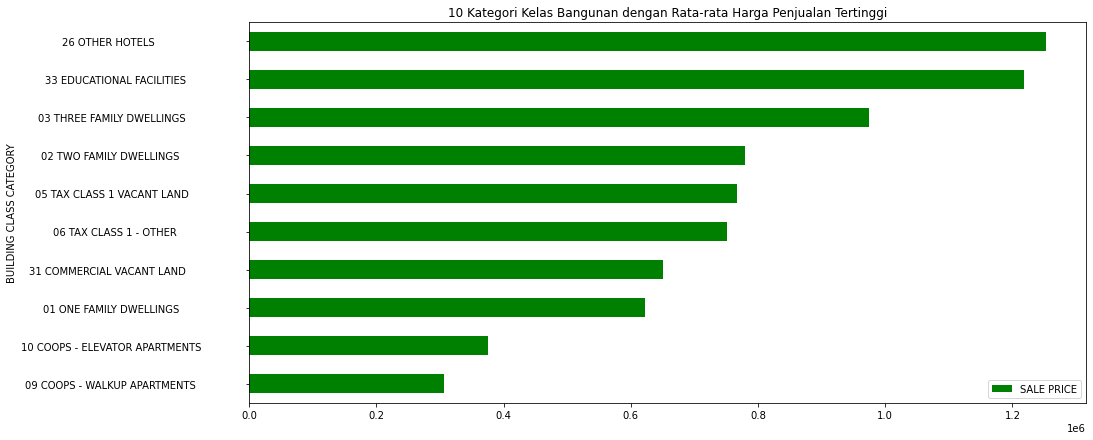

In [44]:
top10BuildClass.plot(kind='barh', figsize=(15,7), color='g')
plt.title('10 Kategori Kelas Bangunan dengan Rata-rata Harga Penjualan Tertinggi')

Berdasarkan plot di atas, diketahui bahwa kategori **OTHER HOTELS** memiliki rata-rata harga penjualan tertinggi, diikuti dengan kategori **EDUCATIONAL FACILITIES**, **THREE FAMILY DWELLINGS**, dan lainnya. Sehingga dapat disimpulkan bahwa kategori kelas bangunan mempengaruhi variasi rata-rata harga penjualan bangunan tersebut.

In [45]:
df_sales['BUILDING CLASS CATEGORY'].mode()[0]

'01 ONE FAMILY DWELLINGS                    '

Diketahui bahwa kategori kelas bangunan dengan jumlah penjualan terbanyak adalah kategori **ONE FAMILY DWELLINGS**.

---
## Distribusi statistik ukuran luas tanah properti (`GROSS SQUARE FEET & LAND SQUARE FEET`)

In [46]:
df_sqf = df_sales[['GROSS SQUARE FEET','LAND SQUARE FEET']]
df_sqf.head()

,GROSS SQUARE FEET,LAND SQUARE FEET
0,6794.0,2272.0
1,4226.0,1750.0
2,3360.0,1520.0
3,3713.0,1779.0
4,3586.0,1218.0


In [47]:
df_sqf.describe()

,GROSS SQUARE FEET,LAND SQUARE FEET
count,2.665500e+04,2.665500e+04
mean,2.686305e+03,3.603452e+03
std,2.520718e+04,3.212287e+04
min,1.200000e+02,2.000000e+02
25%,1.344000e+03,2.000000e+03
50%,1.813000e+03,2.500000e+03
75%,2.505000e+03,3.840000e+03
max,3.750565e+06,4.228300e+06


Perlu diperhatikan bahwa masih terdapat nilai outlier yang tidak dapat disertakan dalam analisis. Nilai luas lahan seluruhnya dan luas bangunan properti yang lebih besar dari nilai statistik kuartil-3 dianggap sebagai outlier dan tidak disertakan dalam analisis.

In [48]:
df_sqf = df_sqf[df_sqf['GROSS SQUARE FEET'] < 3000]
df_sqf = df_sqf[df_sqf['LAND SQUARE FEET'] < 4000]

In [49]:
#nilai modus
print('Nilai modus kolom GROSS SQUARE FEET:', df_sqf['GROSS SQUARE FEET'].mode()[0])
print('Nilai modus kolom LAND SQUARE FEET:', df_sqf['LAND SQUARE FEET'].mode()[0]) 

Nilai modus kolom GROSS SQUARE FEET: 1600.0
Nilai modus kolom LAND SQUARE FEET: 2000.0


<Figure size 864x504 with 0 Axes>

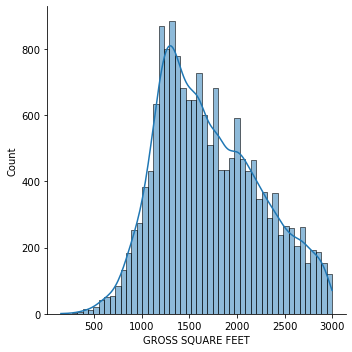

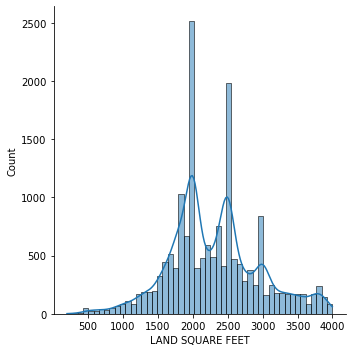

<Figure size 864x504 with 0 Axes>

In [50]:
sns.displot(df_sqf['GROSS SQUARE FEET'],kde=True, bins=50)
sns.displot(df_sqf['LAND SQUARE FEET'],kde=True, bins=50)
plt.figure(figsize=(12,7))

Berdasarkan *output* di atas diketahui bahwa rata-rata luas bangunan properti yang terjual di NYC adalah sekitar 3600 sq feet, dengan rata-rata luas lahan seluruhnya di NYC adalah 2680 sq feet. Dalam plot distribusi frekuensi yang ditunjukkan kedua kolom memiliki pola distribusi yang berbeda. Di mana ukuran luas keseluruhan properti di NYC kebanyakan ada di sekitar 1600 sq feet dan ukuran luas bangunan di NYC kebanyakan ada di sekitar 2000 sq feet.

Namun, perlu menjadi catatan juga bahwa `GROSS SQUARE FEET` adalah ukuran luas lahan seluruhnya dan `LAND SQUARE FEET` adalah luas bangunan. Berarti nilai `LAND SQUARE FEET` kemungkinan tidak akan lebih besar dari `GROSS SQUARE FEET`.

In [51]:
# Menampilkan nilai varians dan standar deviasi
print('Variance and Standar Deviation:\n')
print('GROSS SQUARE FEET: ', np.var(df_sqf['GROSS SQUARE FEET'], ddof=1), 'and', np.std(df_sqf['GROSS SQUARE FEET'],ddof=1))
print('LAND SQUARE FEET: ', np.var(df_sqf['LAND SQUARE FEET'], ddof=1), 'and', np.std(df_sqf['LAND SQUARE FEET'],ddof=1))

Variance and Standar Deviation:

GROSS SQUARE FEET:  289902.6530211974 and 538.4260887263891
LAND SQUARE FEET:  419957.567071179 and 648.0413312985361


Diketahui nilai varians dan standar deviasi masing-masing kolom berdasarkan *output* di atas. Nilai varians `GROSS SQUARE FEET` atau ukuran luas lahan properti seluruhnya adalah 289902.65 dengan standar deviasi sebesar 538.43. Angka ini cenderung cukup besar sehingga dapat diartikan bahwa ukuran luas lahan properti seluruhnya di NYC sangat bervariasi. Selain itu, kolom `LAND SQUARE FEET` atau ukuran luas lahan bangunan properti memiliki nilai varians sebesar 419957.57 dengan standar deviasi sebesar 648.04, yang berarti bahwa ukuran luas lahan bangunan properti di NYC sangat bervariasi (cenderung lebih bervariasi dibanding dengan ukuran luas lahan properti seluruhnya). Dalam kata lain, rata-rata jarak penyimpangan setiap titik data terhadap rata-ratanya sangat besar.

In [52]:
print('GROSS SQUARE FEET\n')
print('Range: ', np.ptp(df_sqf['GROSS SQUARE FEET']))
print('Variance: ', np.var(df_sqf['GROSS SQUARE FEET']))
print('Standar Deviation: ', np.std(df_sqf['GROSS SQUARE FEET']))
print('Skewness: ', scipy.stats.skew(df_sqf['GROSS SQUARE FEET'], bias=False))

print('\n----------------------------------------------\n')

print('LAND SQUARE FEET\n')
print('Range: ', np.ptp(df_sqf['LAND SQUARE FEET']))
print('Variance: ', np.var(df_sqf['LAND SQUARE FEET']))
print('Standar Deviation: ', np.std(df_sqf['LAND SQUARE FEET']))
print('Skewness: ', scipy.stats.skew(df_sqf['LAND SQUARE FEET'], bias=False))

GROSS SQUARE FEET

Range:  2849.0
Variance:  289885.72044406866
Standar Deviation:  538.4103643542429
Skewness:  0.37915125537770444

----------------------------------------------

LAND SQUARE FEET

Range:  3798.0
Variance:  419933.0382722145
Standar Deviation:  648.0224056868825
Skewness:  0.30956225999203935


----
## Apakah ada perbedaan rata-rata luas lahan berdasarkan wilayahnya (`BOROUGH`)?

In [53]:
df_sqf_brgh = df_sales[['BOROUGH','GROSS SQUARE FEET','LAND SQUARE FEET']]
df_sqf_brgh.head()

,BOROUGH,GROSS SQUARE FEET,LAND SQUARE FEET
0,Manhattan,6794.0,2272.0
1,Manhattan,4226.0,1750.0
2,Manhattan,3360.0,1520.0
3,Manhattan,3713.0,1779.0
4,Manhattan,3586.0,1218.0


In [54]:
df_sqf_brgh = df_sqf_brgh.groupby('BOROUGH').mean().reset_index()
df_sqf_brgh

,BOROUGH,GROSS SQUARE FEET,LAND SQUARE FEET
0,Manhattan,13058.794788,2786.459283
1,Bronx,3005.777088,3126.293698
2,Brooklyn,2766.910029,2661.175863
3,Queens,2447.540890,3761.648876
4,Staten Island,2199.338238,5163.624041


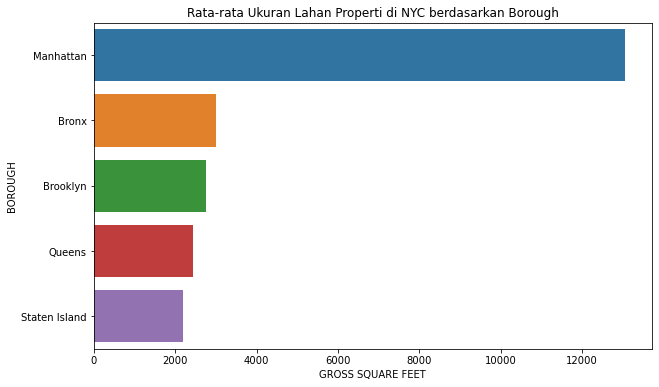

In [55]:
# Visualisasi bar chart
plt.figure(figsize=(10,6))
sns.barplot(y = 'BOROUGH', x = 'GROSS SQUARE FEET', data=df_sqf_brgh)
plt.title("Rata-rata Ukuran Lahan Properti di NYC berdasarkan Borough")
plt.show()

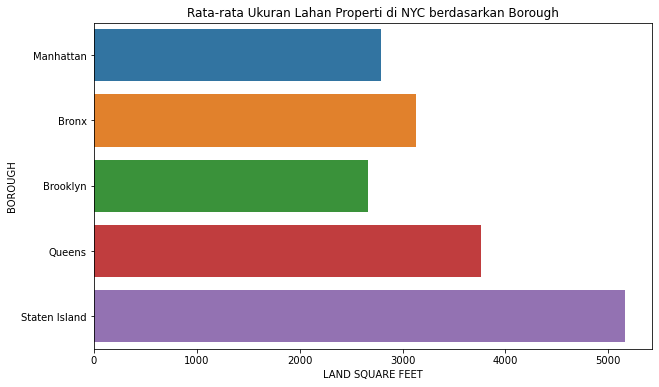

In [56]:
# Visualisasi bar chart
plt.figure(figsize=(10,6))
sns.barplot(y = 'BOROUGH', x = 'LAND SQUARE FEET', data=df_sqf_brgh)
plt.title("Rata-rata Ukuran Lahan Properti di NYC berdasarkan Borough")
plt.show()

Berdasarkan kedua plot di atas, diketahui bahwa rata-rata luas lahan keseluruhan properti tertinggi adalah di wilayah Manhattan dibandingkan dengan wilayah lain, sedangkan Staten Island memiliki rata-rata luas lahan keseluruhan properti terendah. Selain itu untuk rata-rata luas bangunan properti tertinggi adalah di Staten Island, dan yang terendah adalah di Brooklyn. Hal ini memunculkan asumsi bahwa luas lahan keseluruhan mempengaruhi harga jual properti tersebut.

---
## Apakah ada perbedaan jumlah properti yang terjual dan harga terjualnya berdasarkan daerah di sekitarnya (`NEIGHBORHOOD`)?

In [60]:
df_neighborhood = df_sales[['NEIGHBORHOOD','SALE PRICE']]

In [61]:
df_neighborhood = df_neighborhood.groupby('NEIGHBORHOOD').count().sort_values(by='SALE PRICE', ascending=False)
df_neighborhood = df_neighborhood.head(10)
df_neighborhood

,SALE PRICE
NEIGHBORHOOD,
FLUSHING-NORTH,759
EAST NEW YORK,558
BEDFORD STUYVESANT,557
GREAT KILLS,461
SO. JAMAICA-BAISLEY PARK,448
FLATBUSH-EAST,446
RICHMOND HILL,441
BAYSIDE,418
ST. ALBANS,405


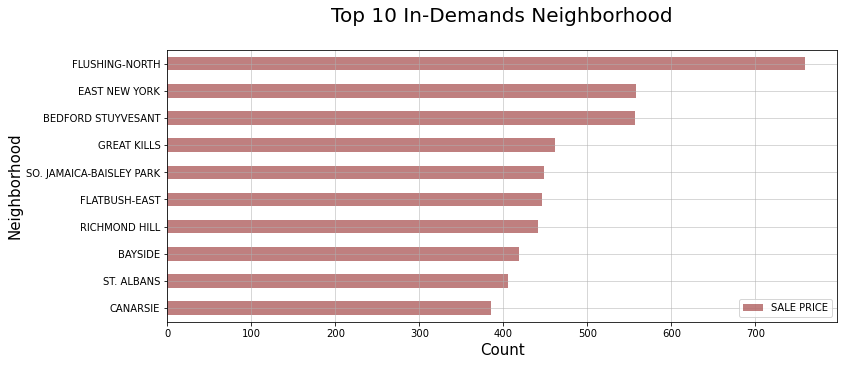

In [62]:
# Visualisasi
df_neighborhood = df_neighborhood.sort_values(by='SALE PRICE')
df_neighborhood.plot(kind='barh',figsize=(12,5),color='maroon',alpha=0.5)
plt.title('Top 10 In-Demands Neighborhood\n', fontsize=20)
plt.ylabel('Neighborhood', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.grid(linewidth=0.5)

Berdasarkan *plot* di atas, diketahui bahwa wilayah FLUSHING-NORTH adalah `NEIGHBORHOOD` atau wilayah sekitar dengan penjualan terbanyak, diikuti oleh EAST NEW YORK, BEDFORD STUYVESANT, dan lain-lain.

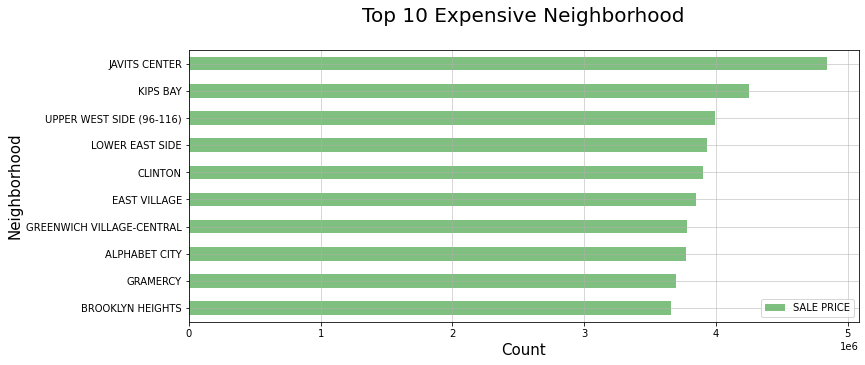

In [63]:
# Membuat dataframe baru berisi kolom NEIGHBORHOOD dan SALE PRICE
df_neighborhood = df_sales[['NEIGHBORHOOD','SALE PRICE']]

# Grouping
df_neighborhood = df_neighborhood.groupby('NEIGHBORHOOD').mean().sort_values(by='SALE PRICE',ascending=False)
df_neighborhood = df_neighborhood.head(10)

# Visualisasi
df_neighborhood = df_neighborhood.sort_values(by='SALE PRICE')
df_neighborhood.plot(kind='barh',figsize=(12,5), color='green', alpha=0.5)
plt.title('Top 10 Expensive Neighborhood\n', fontsize=20)
plt.ylabel('Neighborhood', fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.grid(linewidth=0.5)
plt.show()

Berdasarkan *plot* di atas, diketahui bahwa JAVITS CENTER adalah `NEIGHBORHOOD` atau wilayah sekitar dengan rata-rata harga penjualan tertinggi.

---
## Apakah `GROSS SQUARE FEET` dan `LAND SQUARE FEET` mempengaruhi harga penjualan properti (`SALE PRICE`)?

Text(0.5, 1.0, 'LAND SQUARE FEET vs SALE PRICE')

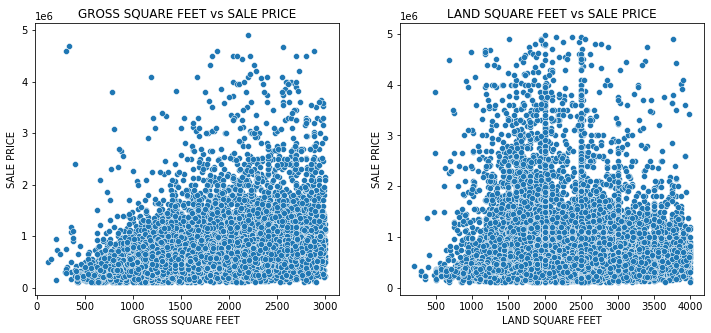

In [64]:
# Membuat dataframe baru berisikan kolom GROSS SQUARE FEET, LAND SQUARE FEET dan SALE PRICE
df_sqf_price = df_sales[['GROSS SQUARE FEET', 'LAND SQUARE FEET','SALE PRICE']]
'''
Ukuran GROSS SQF dan LAND SQF yang lebih besar dari 3000 dan 4000 akan dianggap outlier
'''
df_gross_price = df_sqf_price[df_sqf_price['GROSS SQUARE FEET'] < 3000]
df_land_price = df_sqf_price[df_sqf_price['LAND SQUARE FEET'] < 4000]

# Visualisasi menggunakan scatterplot
fig = plt.figure(figsize=(12,5))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

sns.scatterplot(data=df_gross_price, x='GROSS SQUARE FEET', y='SALE PRICE', ax=ax0)
ax0.set_title('GROSS SQUARE FEET vs SALE PRICE')
sns.scatterplot(data=df_land_price, x='LAND SQUARE FEET', y='SALE PRICE', ax=ax1)
ax1.set_title('LAND SQUARE FEET vs SALE PRICE')

Berdasarkan plot di atas, diketahui secara grafis bahwa ukuran luas lahan properti seluruhnya terindikasi mempunyai pengaruh positif, karena semakin besar ukuran luas lahan properti seluruhnya akan diikuti dengan kenaikan harga jual properti tersebut. Sedangkan ukuran luas bangunan properti terindikasi tidak memiliki pengaruh terhadap harga jual properti tersebut.

---
## Confidence Interval untuk rata-rata harga penjualan di NYC

In [66]:
x = df_sales['SALE PRICE']

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom untuk memnentukan nilai statistik uji

confidance = 0.95 #Peluang
t_crit = np.abs(t.ppf((1-confidance)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))),2)

print(values)

[798482.62 813976.07]


Berdasarkan output di atas, diketahui bahwa rata-rata harga penjualan properti di NYC berada di antara 798.482 USD sampai 813.976 USD dengan peluang atau selang kepercayaan 0.95 atau 95%.

---
## Confidence Interval untuk luas lahan properti seluruhnya di NYC

In [67]:
x = df_sales['GROSS SQUARE FEET']

m = x.mean()
s = x.std()
dof = len(x)-1 #degree of freedom untuk memnentukan nilai statistik uji

confidance = 0.95 #Peluang
t_crit = np.abs(t.ppf((1-confidance)/2,dof)) #nilai statistik uji t

values = np.round((m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))),2)

print(values)

[2383.68 2988.93]


Berdasarkan output di atas, diketahui bahwa luas lahan properti di NYC memiliki rata-rata sebesar 2383.68 square feet sampai degan 2988.93 square feet dengan rata-rata harga sekitar 800.000 USD.

---
## Hypothesis testing untuk `GROSS SQUARE FEET` dan `SALE PRICE`

Sebelumnya telah diketahui bahwa berdasarkan analisis statistik deskriptif, `GROSS SQUARE FEET` atau ukuran luas lahan properti seluruhnya mempengaruhi `SALE PRICE` atau harga penjualan properti tersebut. Maka dari itu, asumsi ini akan dibuktikan apakah `GROSS SQUARE FEET` mempengaruhi `SALE PRICE` menggunakan statistik uji Chi-Square dengan hipotesis sebagai berikut:

H0: `GROSS SQUARE FEET` tidak mempengaruhi nilai `SALE PRICE`

H1: `GROSS SQUARE FEET` mempengaruhi nilai `SALE PRICE`

In [68]:
tbl = [df_sales['GROSS SQUARE FEET'],df_sales['SALE PRICE']]

stat, p, dof, expected = chi2_contingency(tbl)

print('stat=%.3f, p=%.3f' % (stat,p))

if p> 0.05:
    print('Probably Independent')
else:
    print('Probably Dependent')

stat=1859488448.483, p=0.000
Probably Dependent


Berdasarkan hasil analisis uji Chi-square berikut diketahui bahwa p-value < 0.05 yang berarti H0 ditolak. Sehingga, `GROSS SQUARE FEET` mempengaruhi nilai `SALE PRICE`.

---
## Hypothesis testing untuk harga penjualan properti di `Bronx` dan `Staten Island`

Berdasarkan analisis sebelumnya (5.2), diketahui bahwa secara grafis wilayah Bronx dan Staten Island tidak memiliki perbedaan distribusi statistik yang signifikan, tidak seperti wilayah Manhattan dan Brooklyn. Sehingga, ini juga memunculkan asumsi apakah rata-rata harga penjualan properti di Bronx dan Staten Island sama atau tidak. Dengan menggunakan uji statistik t, berikut hipotesisnya:

H0: Rata-rata harga penjualan di Bronx dan Staten Island sama

H1: Rata-rata harga penjualan di Bronx dan Staten Island tidak sama

stat=7.596, p=0.000
Probably different distributions


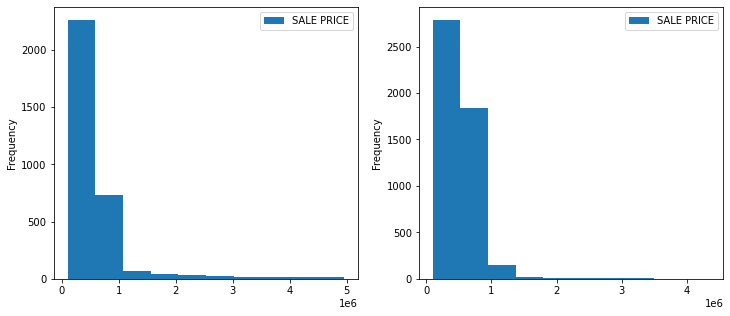

In [69]:
df_sale_price = df_sales[['BOROUGH','SALE PRICE']]
df_bronx = df_sale_price[df_sale_price['BOROUGH']=='Bronx'].drop('BOROUGH', axis=1)
df_staten = df_sale_price[df_sale_price['BOROUGH']=='Staten Island'].drop('BOROUGH', axis=1)

fig = plt.figure(figsize=(12,5))
df_bronx.plot(kind='hist', ax=fig.add_subplot(1,2,1))
df_staten.plot(kind='hist',ax=fig.add_subplot(1,2,2))

stat, p = ttest_ind(df_bronx, df_staten)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Berdasarkan *output* di atas, diketahui bahwa nilai p-value < 0.05 yang berarti H0 ditolak. Sehingga, rata-rata harga penjualan di Bronx dan Staten Island tidak sama. Berarti wilayah `BOROUGH` mempengaruhi harga penjualan properti.

---
## Kesimpulan
Berdasarkan analisis statistik deskriptif dan inferensia, didapakan kesimpulan yaitu sebagai berikut:

- Rata-rata harga penjualan properti di NYC berkisar di antara 798.482 USD sampai 813.976 USD dengan ukuran luas lahan seluruhnya berkisar di antara 2383.68 square feet sampai degan 2988.93 square feet.
- Harga penjualan properti di NYC juga memiliki nilai varians dan standar deviasi yang sangat besar, ini berarti harga penjualan properti di NYC sangat bervariasi.
- Wilayah (`BOROUGH`) mempengaruhi harga penjualan properti. Di mana, wilayah Manhattan adalah wilayah dengan rata-rata harga penjualan tertinggi dan memiliki nilai varians tertinggi juga.
- Selain wilayah, ukuran luas lahan properti seluruhnya (`GROSS SQUARE FEET`) juga mempengaruhi harga penjualan properti di NYC, di mana berdasarkan informasi secara grafis, semakin besar ukuran luas lahan properti, maka harga jual juga semakin tinggi.
- Queens adalah wilayah dengan jumlah penjualan properti paling banyak.
- Semakin lama usia properti atau bangunan tersebut, rata-rata harga jual cenderung semakin tinggi.

- Kategori **ONE FAMILY DWELLINGS** adalah kategori kelas bangunan dengan jumlah penjualan tertinggi.
